In [1]:
# import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./work/viikko11/datasets/diabetes.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]


# onko null arvoja
print (f'Null values: \n{df.isnull().sum()}')

# muutetaan null nollaksi
X = X.fillna(0)


Null values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:

# Training the Logistic Regression model on the Training set
model = LogisticRegression()
model.fit(X_train, y_train)


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5]:

# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix and accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)


print ('cm:')
print(cm)
print(f'accuracy_score: {acc}\n')
print(f'recall_score: {rs}\n')
print(f'precision_score: {ps}\n')


cm:
[[98  9]
 [18 29]]
accuracy_score: 0.8246753246753247

recall_score: 0.6170212765957447

precision_score: 0.7631578947368421



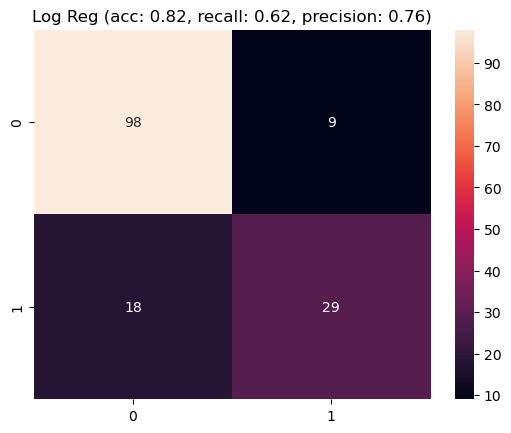

In [6]:

# Visualivoidaan confusion matrix
tn, fp, fn, tp = cm.ravel() # ravel palauttaa litistetyn taulukon
ax = plt.axes()
sns.heatmap(cm, ax = ax, annot=True, fmt='g')
ax.set_title(f'Log Reg (acc: {acc:.02f}, recall: {rs:.02f}, precision: {ps:.02f})')
plt.show()


# # Predicting new
# df_new = pd.read_csv('diabetes-new.csv')
# df_new_org= df_new
# df_new = sc.transform(df_new)
# y_new = model.predict_proba(df_new)


# for i in range (len(y_new)):
#     print (f'{df_new_org.iloc[i]}\nDiabetes: {y_new[i][0]:.02f}\n')


